

# Project: Investigate No-show appointments data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we are going to take the No-show appointments data set and see what are the characteristic of it and mainly see what are the reasons that makes the patients don't show to their appointments


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [45]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Here we want to now how many rows and columns in the data frame

In [46]:
df.shape

(110527, 14)

> Here we look at data types and check if there is a null value or not

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that ScheduledDay and AppointmentDay are string insted of date and also No-show is string insted of 0 and 1 and we need to make a new column for numbers of days until the appointment also which day of the week it is

> Here we gonna see the statistics and check if there is any non correct data 

In [48]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can se that the age have a minimum of -1 anda max of 115 and most likely that those are not correct values

In [49]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


that is mostly a false patient so we are going to drop it in the cleaning phase

In [50]:
df[df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


Here also we see two patients those are 115 in age and most likely that this is not correct so we are going to drop it in the cleaning phase

> Here we check if the data frame have any duplicate data 

In [51]:
df.duplicated().sum()

0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Rename, Drop, Replace)

> Here we want the labels to be in lower case and replace the space with underscore and fix some typos and make it easier to read

In [52]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Here we drop the columns that we are not going to use

In [53]:
df.drop(['gender','neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap'], axis=1, inplace=True)
df.head(1)

,patient_id,appointment_id,scheduled_day,appointment_day,age,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,No


> Change the `no_show` data to 0 and 1 insted of Yes and No to make it simple to analyze 

In [54]:
df['no_show'] = df['no_show'].map({'Yes':1, 'No':0} )
df.head(1)

,patient_id,appointment_id,scheduled_day,appointment_day,age,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0


> Here we changed the `scheduled_day` and `appointment_day` from string to datetime and create a column `time_until_appointment` to see how many day until the appointment also created `day_of_week` to specify which day of the week the appointment was on

In [55]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')
df['time_until_appointment'] = (df.appointment_day - df.scheduled_day).dt.days 
df['day_of_week'] = df.scheduled_day.dt.weekday_name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
patient_id                110527 non-null float64
appointment_id            110527 non-null int64
scheduled_day             110527 non-null datetime64[ns]
appointment_day           110527 non-null datetime64[ns]
age                       110527 non-null int64
sms_received              110527 non-null int64
no_show                   110527 non-null int64
time_until_appointment    110527 non-null int64
day_of_week               110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 7.6+ MB


> Here we make shure that the data we got in `time_until_appointment` is correct

In [56]:
df.time_until_appointment.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_until_appointment, dtype: float64

We can see that there is -6 value which has to be not correct

> Here we drop the three patients those `age` was not correct also drop the false rows in `time_until_appointment` 

In [57]:
df = df[(df.age > -1) & (df.age < 115) & (df.time_until_appointment > -1)]
df.describe()

,patient_id,appointment_id,age,sms_received,no_show,time_until_appointment
count,1.105160e+05,1.105160e+05,110516.000000,110516.000000,110516.000000,110516.000000
mean,1.474894e+14,5.675304e+06,37.085861,0.321049,0.201880,10.184272
std,2.560844e+14,7.129723e+04,23.104465,0.466882,0.401405,15.255201
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000
50%,3.173016e+13,5.680570e+06,37.000000,0.000000,0.000000,4.000000
75%,9.439068e+13,5.725524e+06,55.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:  Is the showed up patients are more than not showed up?

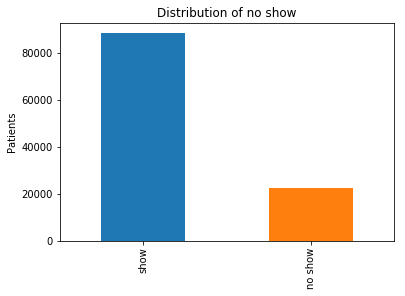

In [58]:
no_show_bar = df['no_show'].value_counts().plot.bar()
no_show_bar.set_xticklabels(["show", "no show"])
no_show_bar.set_ylabel("Patients")
no_show_bar.set_title('Distribution of no show');

We can see that the number of patients that showed up is soo much more than those who have not

### Research Question 2: is the sms_received make patients show to the appointment?

> Here we are going to plot the patients who received and did not receive an sms and the percentage of no_show

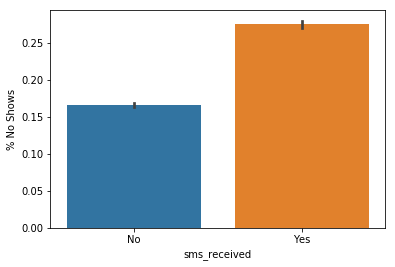

In [59]:
# this dictionary will be used to map 1s and 0s to Yeses and Nos
yesno = {1:'Yes', 0:'No'}
ax = sns.barplot(x=df.sms_received.map(yesno), y=df.no_show)
ax.set_ylabel('% No Shows')
plt.show()

It is very wierd it is shown that the percentage of no show is much higher when sms is received 

### Research Question 3: is the days until appointment make patients show to the appointment?

In [ ]:

ax = sns.barplot(x=df.no_show.map(yesno), y=df.time_until_appointment)
ax.set_xlabel('No Shows')
plt.show()

We see that the patients who their `time_until_appointment` is further later they tend to not show to their appointment

<a id='conclusions'></a>
## Conclusions

> Finally, we see that the patients are more likely to show to their appointment but the wierd thing is that the patients who are notified by sms massage are more likely to not show up to the appointment and as susbected the more days until appointment the higher chance that the patint do not show to the appointment 

